pass 3.4905171317103023
pass 5.6945313795961745
pass 5.595698101458295
pass 8.214833370815112
pass 5.700835561607024
pass 4.900814316363646
pass 4.220635473659208
pass 0.7816104984107525
pass 6.123161133978387
pass 5.592785688016793
pass 0.5951371153050407
pass 3.28495960075518
pass 6.133824692622742
pass 8.33679862188282
pass 3.9661164530345245
pass 7.422095966015106
pass 5.786366797806826
pass 2.946566421782714
pass 2.1408356464720977
pass 5.966788218843008
pass 7.68738419826664
pass 10.538084383079056
pass 7.42479631100191
pass 7.971765845131238
pass 3.0775634267002636
pass 7.0122680839002385
pass 10.527343334472397
pass 5.18319861547034
pass 3.511246263471082
pass 3.595272220884683
pass 8.46417690012029
pass 9.289780982311497
pass 3.777846312384662
pass 2.9173292285848893
pass 9.282816368292469
pass 10.754017178619495
pass 1.7142788550412151
pass 2.1275327045816113
pass 6.175380182931616
pass 7.573502566796566
pass 2.7359268956714313
pass 1.2933566146718352
pass 7.2318915073545575


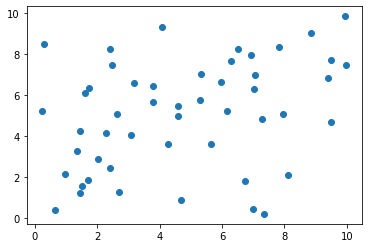

Streaming output truncated to the last 5000 lines.
tot -0.004774256128678023
gap 5.421743233901964
f -2.0157482105371158e-08
tot -2.0157482105371158e-08
gap 5.770062805348041
f -1.3873521711884071e-08
tot -3.403100381725523e-08
gap 2.019140365193278
f -7.555626566339971e-06
tot -7.589657570157227e-06
gap 3.9551137990188288
f -1.3375685565972689e-07
tot -7.723414425816954e-06
gap 5.174778624912333
f -2.666363196022637e-08
tot -7.75007805777718e-06
gap 5.389327103663481
f -2.089597775153138e-08
tot -7.770974035528712e-06
gap 4.957744828876502
f -3.4479815858219796e-08
tot -7.805453851386932e-06
gap 2.6096509761728623
f -1.6209712419885541e-06
tot -9.426425093375486e-06
gap 5.767059948314119
f -1.3916921090911721e-08
tot -9.440342014466398e-06
gap 6.325321305542101
f -7.994189036529071e-09
tot -9.448336203502927e-06
gap 2.7680031014549167
f -1.1383359845798246e-06
tot -1.0586672188082753e-05
gap 5.494874371416309
f -1.860044583766629e-08
tot -1.0605272633920418e-05
gap 3.7828357036332685


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
tot -0.17071376532339125
v -1.0797817487709062e-06
tot -0.17071484510514
v -4.24694747979922e-08
tot -0.1707148875746148
v -2.0782757133933753e-08
tot -0.17071490835737194
g -7.358600879584217
v -4.386068512426373e-08
tot -4.386068512426373e-08
v -1.5645238897121313e-08
tot -5.9505924021385047e-08
v -1.1596962416619349e-05
tot -1.1656468340640734e-05
v -4.34265949663701e-08
tot -1.1699894935607104e-05
v -5.9287766971956906e-08
tot -1.175918270257906e-05
v -1.1488748533745049e-07
tot -1.187407018791651e-05
v -6.561187582186835e-06
tot -1.8435257770103347e-05
v -4.418793900769808e-06
tot -2.2854051670873155e-05
v -4.930859441817615e-08
tot -2.290336026529133e-05
v -4.116601085454895e-08
tot -2.294452627614588e-05
v -3.5644001860664297e-08
tot -2.2980170278006546e-05
v -2.0103332341271766e-08
tot -2.300027361034782e-05
v -2.9415612587882586e-07
tot -2.3294429736226643e-05
v -6.257975833356805e-08
tot -2.335700949456021e-05
v -1.3428605881

In [ ]:
import time
from datetime import datetime
import numpy as np
import sympy as sym
import math
import array
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as sx
import matplotlib.mlab as mlab
from sklearn.neighbors import KernelDensity as kd
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import random
from cmath import sqrt
atoms = 50
rounds = 1
steps = 100000
v_total =[[(i,n)for n in range(atoms)]for i in range(steps)]
b = steps-1
ergo = [[(p,i) for i in range(b)]for p in range(rounds)]
v_sqr_avgst = [[(p,i) for i in range(steps)]for p in range(rounds)]
v_avg_sqrst = [[(p,i) for i in range(steps)]for p in range(rounds)]
v_avgstore = [[(p,i) for i in range(steps)]for p in range(rounds)]

delta_store = []
acceptance = []

dt = 300
sigma = 0.2
g_store = []
x_store= [(0) for i in range (atoms)]
y_store= [(0) for i in range(atoms)]
v_total1 = [[(g,i)for i in range(atoms)]for g in range(steps)]
min_value = 0.
max_value = 10.
delta =3
sig = 10/atoms
copies = 2
a = 2
kb = 1.98e-3
distance_store = []
dis_store = []
epsilon = 2

#print("ghg")
def rand_generator(a,b):#generates a random number within the limits a and b
    val = random.uniform(a,b)
    return val

def potential(x):#generates LJ potential values based on distance x
     v = 4*epsilon*((sigma/x)**12-(sigma/x)**6)


     return(v)

def cut_off(x_new,y_new): #applies Periodic Boundary Conditions, atom that leaves the box from the right end of the box
                          #enters the box from the left end.
    if x_new > max_value:
       x_new -= max_value

    if y_new > max_value:
       y_new -= max_value
    if x_new <= min_value:
         x_new += max_value
    if y_new <= min_value:
         y_new += max_value

    return(x_new,y_new)


def boltzmann(dE,T): #calculates boltzmann energy values for the energy of a move.
  a = (-1*dE)/(kb*T)
  exp_val = np.exp(a)
  return exp_val

def select(x_ini,y_ini,x_later,y_later,v_ini,v_later,T):#accepts or rejects a move based on energy or
                                                        #boltzmann value calculated to the corresponding energy

  if v_later < v_ini:
    v_ini = v_later
    x_ini = x_later
    y_ini =y_later

  else:
    dE = v_later-v_ini
    #print("DE",dE)
    r = rand_generator(0,1)
    #print("r",r)

    #print("random",r)
    bolt = boltzmann(dE,T)
    #print("bolt",bolt)
    if (r <= bolt):
      v_ini = v_later
      x_ini = x_later
      y_ini = y_later


  return x_ini,y_ini,v_ini

def move(x_ini,y_ini,delta): # makes a move by multiplying delta(size of move) by a random number between -1 and 1
    x_new = x_ini + rand_generator(-1,1)*delta
    y_new = y_ini + rand_generator(-1,1)*delta
    #print('**',x_new,y_new)
    xi,yi= cut_off(x_new,y_new)

    #print(xi,yi)
    return xi,yi

def mc(temp,start,increments,z):
    v_sqr = 0
    v_sqr_t = 0
    v_tot = 0
    v_avg = 0
    v_avg_sqr = 0
    #print("z",z)
    t = atoms

    for n in range(start,increments):


          index= int(random.uniform(0,t))# choses an atom to move randomly.



          x_ini = rx_store[index][n] # writes initial coordinates the variable x_ini and y_ini
          #print(x_ini)
          y_ini = ry_store[index][n]
          #print(y_ini)
          x_ii,y_ii = move(x_ini,y_ini,delta)# moves the atom based on size of move and initial coordinates of the atom
          gap1_store = []
          v_tot = 0

          for l in range(atoms):#selects all the atoms except for the randomly chosen atom to moove and writes
                                #it's coordinates to x_nei and y_nei
              if l != index :


                x_nei = rx_store[l][n]
                #print(x_ini)
                y_nei = ry_store[l][n]
                #print(y_ini)

                #print("l",l)


                x_gap = abs(x_ii-x_nei)#calculates the x and y coordinate distances between the seleced neighbor atom and itself
                y_gap = abs(y_ii-y_nei)

                if x_gap > max_value/2 :#applies minimum image convention, if the gap between neighbor and the selected atom
                                        #is greater than the cut-off(half of the box length) , the gap is subtracted by the
                                        #box length to apply minimum image convention
                      x_gap = 10 - x_gap
                if y_gap > max_value/2:
                        y_gap = 10 -y_gap

                gap = math.sqrt(x_gap**2 + y_gap**2)
                print("here")
                v = potential(gap) #LJ potential is calculated based on the box distance between the neighbor and the
                                   #selected atom too move.
                v_tot = v_tot + v
                gap1_store.append(gap)#stores distances between atoms in a list


                #print("gap",gap1_store)
                o = (len(gap1_store))
          count = 0
          for b in range(o):          #compares the distances and sig(gap that should be maintained between atoms)
              if gap1_store[b] < sig:
                break
              else:
                count = count  +1    #keeps the count of the number of instances accepted




          if count == o:            #proceeds only if all atoms maintain atleast a distance of sig
                v_ini = v_total[n][index]

                #print ("temp",temp)


                #print("x_ini",x_ini)
                print("vini",v_ini)
                x_ini,y_ini,v_ini= select(x_ini,y_ini,x_ii,y_ii,v_ini,v_tot,temp)#returns the selected x coordinates and y coordinates of the moved atom
                for l in range(n,increments): #writes the selected coordinates and potential in the list from the current step onwards
                    v_total[n][index] = v_ini


                for l in range(n,increments):
                    rx_store[index][l] = x_ini
                    ry_store[index][l] = y_ini


                for c in range(atoms):#after each step calculate (after each move)calculates potential of each particle and
                                      #stores in the list v_total1



                            v_tot =0
                            x_ini = rx_store[c][n]
                          #  print(x_ini)
                            y_ini = ry_store[c][n]
                          # print(y_ini)

                            for u in range(atoms):
                                if u != c :


                                  x_nei = rx_store[u][n]
                                  #print("x_nei",x_nei)
                                  y_nei = ry_store[u][n]
                                  #print("y_nei",y_nei)
                                  x_gap = abs(x_ini-x_nei)
                                  y_gap = abs(y_ini-y_nei)
                                  if x_gap > max_value/2 :
                                        x_gap = 10 - x_gap
                                  if y_gap > max_value/2:
                                          y_gap = 10 -y_gap

                                  gap = math.sqrt(x_gap**2 + y_gap**2)
                                  #print("here")
                                  v = potential(gap)
                                  print("v",v)
                                  v_tot = v_tot + v
                                  print("tot",v_tot)
                            h = n-1
                            v_ini = v_total1[h][c]
                            g = v_tot+v_ini
                            print("g",g)
                            v_total1[n][c] =g

h = rounds

for z in range(rounds):
      acc = 0
      y = 10
      r = steps
      copies = 2
      rx_store = [[(i,n)for n in range(r)]for i in range(atoms)]
      ry_store = [[(i,n)for n in range(r)]for i in range(atoms)]
      vx_store = []
      vy_store = []
      dis_store = []

      count = 0
      p = 0



      while (p < atoms):#generates 50 atoms in the box with a minimum distance of sig between each of them and writes generated
                        #coordinates and potentials to lists
          #print("p",p)
          x_ini = rand_generator(0,10)
          y_ini = rand_generator(0,10)
          v_tot = 0
          dis_store = []

          if p == 0:

            for l in range(r):
                    rx_store[p][l] = x_ini
                    ry_store[p][l] = y_ini
            #print(x_store)


            t = math.sqrt((x_ini)**2 + (y_ini)**2)
            v_ini = potential(t)
            for i in range(steps):

                  v_total[i][p] = v_ini
            p = p+1
          else:
              #print("p",p)
              for s in range(p):

                  dis_store.append(math.sqrt((x_ini-rx_store[s][0])**2 + (y_ini-ry_store[s][0])**2))

              count = 0
              for i in range(p):

                if dis_store[i] < sig:
                   print("dis",dis_store[i])
                   break

                else :
                  print("pass",dis_store[i])
                  count = count  +1
              if count == p:
                for i in range(p):
                  s = dis_store[i]
                  v = potential(s)

                  v_tot = v_tot + v


                for l in range(r):

                        rx_store[p][l] = x_ini
                        ry_store[p][l] = y_ini
                for i in range(steps):
                    v_total[i][p] = v_tot

                p = p +1

      #print(rx_store)
      #print(ry_store)

      xx_store = []
      yy_store = []
      for i in range(atoms):
            gx = rx_store[i][0]
            #print("gx",gx)
            gy = ry_store[i][0]
            xx_store.append(gx)
            yy_store.append(gy)
      plt.scatter(xx_store,yy_store)
      plt.pause(1)
      plt.xlabel("x")
      plt.ylabel("y")
      #print("rx",rx_store)
      #print("ry",ry_store)
      x = 1

      q = 1
      acc = 0
      count1 = 0

      #print("rx",rx_store)
      #print("ry",ry_store)

      xx_store = []
      yy_store = []

      dt = 300
      count = 0

      increments = steps
      q = 2
      temp = 300
      #print("v",v_total)

      for c in range(atoms):
        x_ini =  rx_store[c][0]
        y_ini =  ry_store[c][0]
        v_tot = 0
        for u in range(atoms):
              if u != c :


                  x_nei = rx_store[u][0]
                  #print("x_nei",x_nei)
                  y_nei = ry_store[u][0]
                  #print("y_nei",y_nei)
                  x_gap = abs(x_ini-x_nei)
                  y_gap = abs(y_ini-y_nei)
                  if x_gap > max_value/2 :
                        x_gap = 10 - x_gap
                  if y_gap > max_value/2:
                          y_gap = 10 -y_gap

                  gap = math.sqrt(x_gap**2 + y_gap**2)
                  #print("here")
                  print("gap",gap)
                  v = potential(gap)
                  print("f",v)
                  v_tot = v_tot +v
                  print("tot",v_tot)
        for i in range(steps):
            v_total1[i][c]= v_tot

      print(v_total1)
      print(rx_store)
      print(ry_store)
      mc(300,x,steps,z)
v_d = 0
v_average= []
for i in range(atoms):
  v_d = 0
  for p in range(steps):

      v = v_total1[p][i]
      print("v",v)
      v_d = v_d +v
  v_avg = v_d/steps
  v_average.append(v_avg)
print("v_average",v_average)

print("rx",rx_store)
#print("ry",ry_store)

steps_store=[]
i = 0
while i<atoms:
    steps_store.append(i)
    i = i+1
plt.plot(steps_store,v_average)
plt.ylabel("<v>")
plt.xlabel("atoms")
plt.show()
print("v_tot",v_total1)